# A) Statistical studies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(42)

## Reading the serie

In [2]:
df = pd.read_csv('/kaggle/input/cleaned-solar-energy-dataset/Solar_energy_cleaned.csv')
df.head(24)

,Time,SolarEnergy
0,2022-06-07 00:00:00,0.000000
1,2022-06-07 01:00:00,0.000000
2,2022-06-07 02:00:00,0.000000
3,2022-06-07 03:00:00,0.000000
4,2022-06-07 04:00:00,0.000000
5,2022-06-07 05:00:00,0.099041
6,2022-06-07 06:00:00,0.765115
7,2022-06-07 07:00:00,1.733899
8,2022-06-07 08:00:00,2.829990
9,2022-06-07 09:00:00,3.828032


In [3]:
df['Time'] = pd.to_datetime(df['Time'])
ts_data = pd.Series(df['SolarEnergy'].values, index=df['Time'])

<Axes: xlabel='Time'>

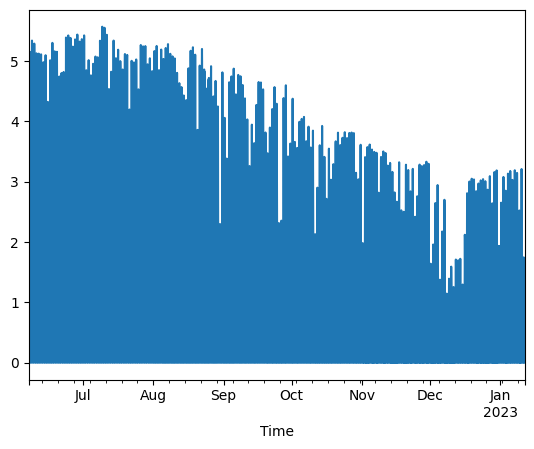

In [4]:
ts_data.plot()

# 1) Visualisation

a) observation

Text(0, 0.5, 'Value')

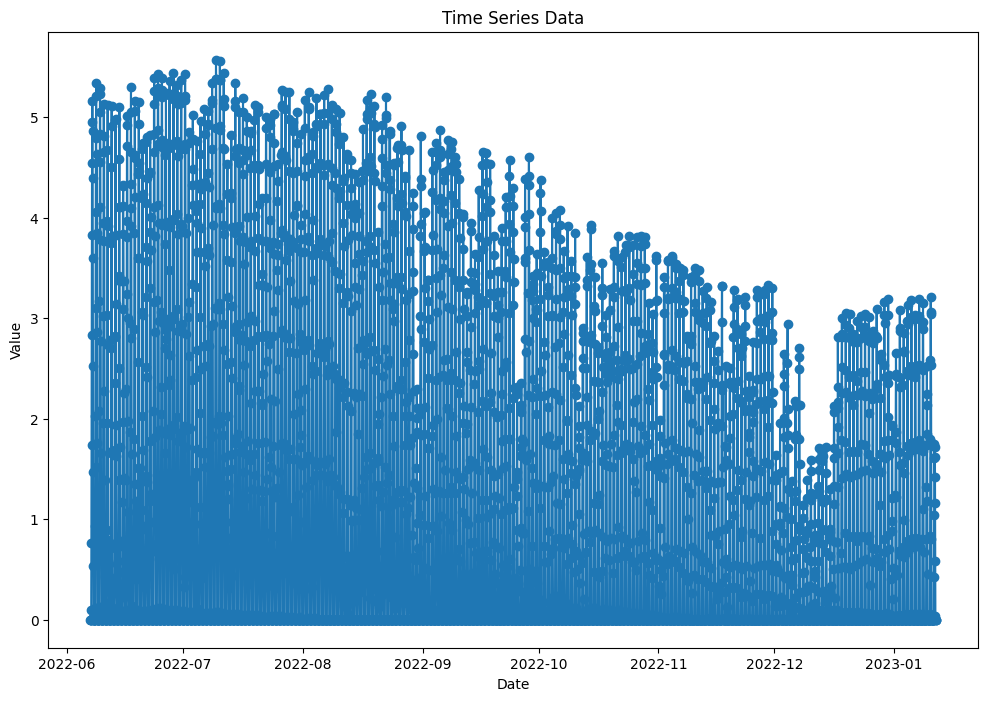

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(ts_data, marker='o', linestyle='-')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')

b) Descriptive statistics

In [6]:
ts_data.describe()

count    5253.000000
mean        1.113691
std         1.540390
min         0.000000
25%         0.000000
50%         0.039414
75%         2.116043
max         5.571090
dtype: float64

With statsmodels

In [7]:
from statsmodels.stats.descriptivestats import describe

print(describe(ts_data))

                              0
nobs               5.253000e+03
missing            0.000000e+00
mean               1.113691e+00
std_err            2.125333e-02
upper_ci           1.155347e+00
lower_ci           1.072035e+00
std                1.540390e+00
iqr                2.116043e+00
iqr_normal         1.568625e+00
mad                1.299889e+00
mad_normal         1.629169e+00
coef_var           1.383140e+00
range              5.571090e+00
max                5.571090e+00
min                0.000000e+00
skew               1.172661e+00
kurtosis           3.067140e+00
jarque_bera        1.204916e+03
jarque_bera_pval  2.268547e-262
mode               0.000000e+00
mode_freq          4.625928e-01
median             3.941397e-02
1%                 0.000000e+00
5%                 0.000000e+00
10%                0.000000e+00
25%                0.000000e+00
50%                3.941397e-02
75%                2.116043e+00
90%                3.702197e+00
95%                4.495723e+00
99%     

# 2) Stationarity tests

## 2-1) is the time serie stationary?

<div style="background-color: red; padding: 10px; border-left: 5px solid #c62828;">
  <strong>Warning:</strong> H0 and H1 of ADF/PP are inversed with those of KPSS
</div>

### a) ADF

In [8]:
a = adfuller(ts_data)
print("The test statistic: ", a[0])
print("pvalue: ", a[1])
for key, value in a[4].items():
    print("Critical values for the test statistic at the ",key,": ",value)

The test statistic:  -3.907534820929697
pvalue:  0.00198008945849489
Critical values for the test statistic at the  1% :  -3.4316021560844296
Critical values for the test statistic at the  5% :  -2.862093322832835
Critical values for the test statistic at the  10% :  -2.567064533513427


- All the comparaison done for significance level 0.05 (5%)
    - pvalue = 0.001 $ \leq $ significance level = 0.05
    - test statistic = -3.90 $ \leq $ critical value (%5) = -2.86
- We reject the $H_0$, so the time serie is stationary

b) KPSS

In [9]:
b = kpss(ts_data)
print("The test statistic: ", b[0])
print("pvalue: ", b[1])
for key, value in b[3].items():
    print("Critical values for the test statistic at the ",key,": ",value)

The test statistic:  10.625400231858379
pvalue:  0.01
Critical values for the test statistic at the  10% :  0.347
Critical values for the test statistic at the  5% :  0.463
Critical values for the test statistic at the  2.5% :  0.574
Critical values for the test statistic at the  1% :  0.739


/tmp/ipykernel_142/3987708660.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  b = kpss(ts_data)


- All the comparaison done for significance level 0.05 (5%)
    - pvalue = 0.01 $ \leq $ significance level = 0.05
    - test statistic = 10.62 > critical value (5%) = 0.463
- We reject the $H_0$, so the time serie is not stationary

c) PP

In [10]:
!pip install arch

In [11]:
from arch.unitroot import PhillipsPerron as pp

pp(ts_data)

Test Statistic,-12.010
P-value,0.000
Lags,33


- All the comparaison done for significance level 0.05 (5%)
    - pvalue = 0 $ \leq $ significance level = 0.05
    - test statistic = -12.010 $ \leq $ critical value (5%) = -2.89
- We reject the $H_0$, so the time serie is stationary

## 2-2) Why the test statistic of ADF/PP is different than KPSS ?
- ADF/PP:
    - the test statistic is based on the idea of testing the presence of a unit root
    - ADF test uses AR with lagged differences to account for autocorrelation, while the PP test corrects for serial correlation non-parameticly
    - The test statistic is compared to critical values, and if it is more negative than the critical value, the null hypothesis (unit root) is rejected.
    
- KPSS:
    - The test statistic is based on the idea of test the stationatity around a deterministic trend or level.
    - It calculates the cumulative sum of residuals from a regression of the series on a constant (or a constant and trend) and compares it to the asymptotic distribution of the test statistic.
    - If the test statistic exceeds the critical value, the null hypothesis (stationarity) is rejected.

# 3) Analysis of the time structure

## 3-1) ACF and PACF plots

Text(0.5, 0.98, 'ACF and PACF Plots of original time series')

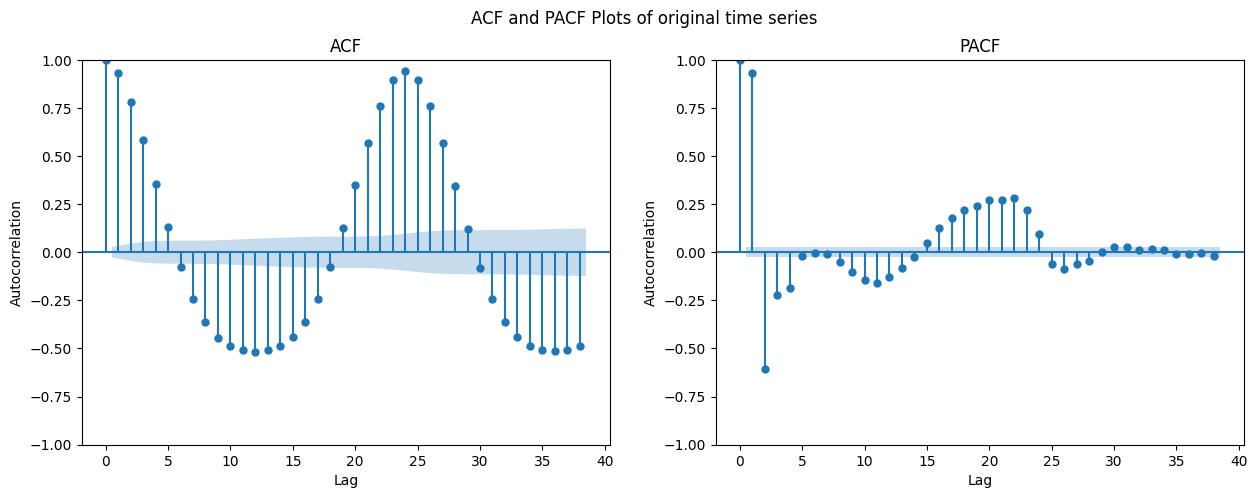

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, ax = plt.subplots(1,2, figsize=(15,5))


plot_acf(ts_data, ax = ax[0])
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')
ax[0].set_title("ACF")


plot_pacf(ts_data, ax = ax[1])
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocorrelation')
ax[1].set_title("PACF")

fig.suptitle("ACF and PACF Plots of original time series")

# For the stationary TS
- ACF plot damped sin function:
    - So it is a AR(p) model
- PACF plot:
    - We have only 4 significant chart
- Our time serie is seasonal by 24 hours:
    - PACF is seasonal so P = 1
    - ACF is seasonal ans at lag Q = 1
    - seasonality period s = 24
    - No need for seasonal differencing D = 0
- Conclusion:
    - we can use SARIMAX(data, order=(4, 0, 0), seasonal_order=(1, 0, 1, 24))

## 3-2) Decomposition

a) Multiplicative model

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decom_plot = seasonal_decompose(ts_data, model='multiplicative')
decom_plot.plot()
plt.show()


ValueError: Multiplicative seasonality is not appropriate for zero and negative values

b) additive model

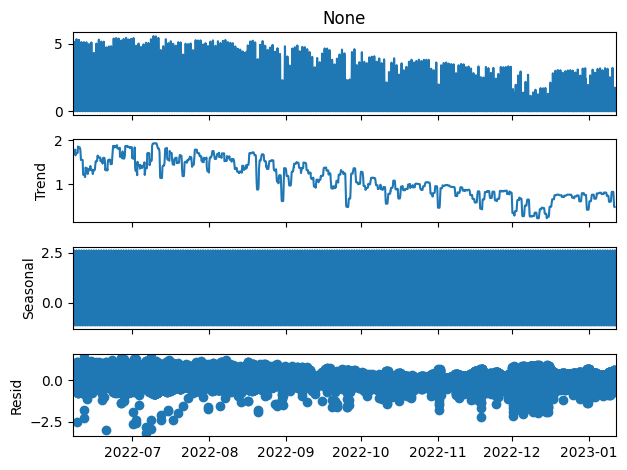

In [14]:
decom_plot = seasonal_decompose(ts_data, model='additive')
decom_plot.plot()
plt.show()


# 4) Modelisation

## 4.1- ARMA Model with the concluded params from ACF and PACF plot

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                 None   No. Observations:                 5253
Model:             SARIMAX(4, 0, 0)x(1, 0, [1], 24)   Log Likelihood               -1397.954
Date:                              Fri, 09 May 2025   AIC                           2809.907
Time:                                      18:48:24   BIC                           2855.873
Sample:                                  06-07-2022   HQIC                          2825.977
                                       - 01-11-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7104      0.005    151.717      0.000       0.701       0.720
ar.L2         -0.11

Text(0.5, 1.0, 'ARMA Model Predicitons (with get_forecast)')

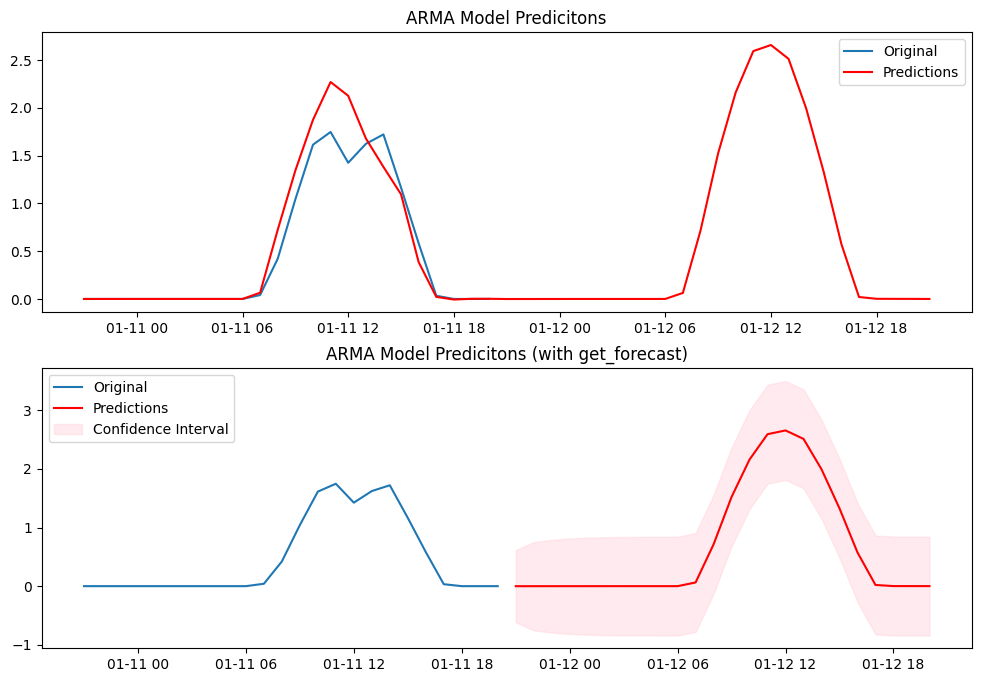

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(ts_data, order=(4, 0, 0), seasonal_order=(1, 0, 1, 24))
arma = model.fit()

print(arma.summary())

#1st method of prediction:
predictions = arma.predict(start=len(ts_data)-24, end=len(ts_data)+24) # Example: predict last 24 values and 24 future values

#2nd method of prediction:
forecast = arma.get_forecast(steps=24)
forecast_ci = forecast.conf_int()


fig, ax = plt.subplots(2,1, figsize=(12, 8))




ax[0].plot(ts_data[-24:], label='Original')
ax[0].plot(predictions, color='red', label='Predictions')
ax[0].legend()
ax[0].set_title("ARMA Model Predicitons")



ax[1].plot(ts_data[-24:], label='Original')
ax[1].plot(forecast.predicted_mean, color='red', label='Predictions')
ax[1].fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
ax[1].legend()
ax[1].set_title("ARMA Model Predicitons (with get_forecast)")


## 4.2) Searching for the best ARIMA params

In [20]:
!pip install pmdarima

In [21]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import numpy as np
import pmdarima as pm

# Assuming your hourly solar energy time series data is in a variable called 'ts_data'

best_model = pm.auto_arima(ts_data,
                           seasonal=True,
                           m=24,
                           stationary=True, 
                           start_p=1,       
                           max_p=4,         
                           d=0,             
                           start_q=0,       
                           max_q=2,         
                           start_P=0,       
                           max_P=1,         
                           D=0,            
                           start_Q=0,      
                           max_Q=1,         
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)   

print(best_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=8983.549, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=19449.335, Time=0.11 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=22.23 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=10634.043, Time=10.81 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=21656.550, Time=0.07 sec
 ARIMA(1,0,0)(0,0,1)[24] intercept   : AIC=7116.556, Time=10.87 sec
 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=39.01 sec
 ARIMA(0,0,0)(0,0,1)[24] intercept   : AIC=14904.872, Time=5.10 sec
 ARIMA(2,0,0)(0,0,1)[24] intercept   : AIC=6168.455, Time=15.60 sec
 ARIMA(2,0,0)(0,0,0)[24] intercept   : AIC=6591.943, Time=1.01 sec
 ARIMA(2,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=52.21 sec
 ARIMA(2,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=34.35 sec
 ARIMA(3,0,0)(0,0,1)[24] intercept   : AIC=5935.754, Time=19.27 sec
 ARIMA(3,0,0)(0,0,0)[24] intercept   : AIC=6328.509, Time=1.37 sec
 ARIMA(3,0,0)(1,0,1)[24] in

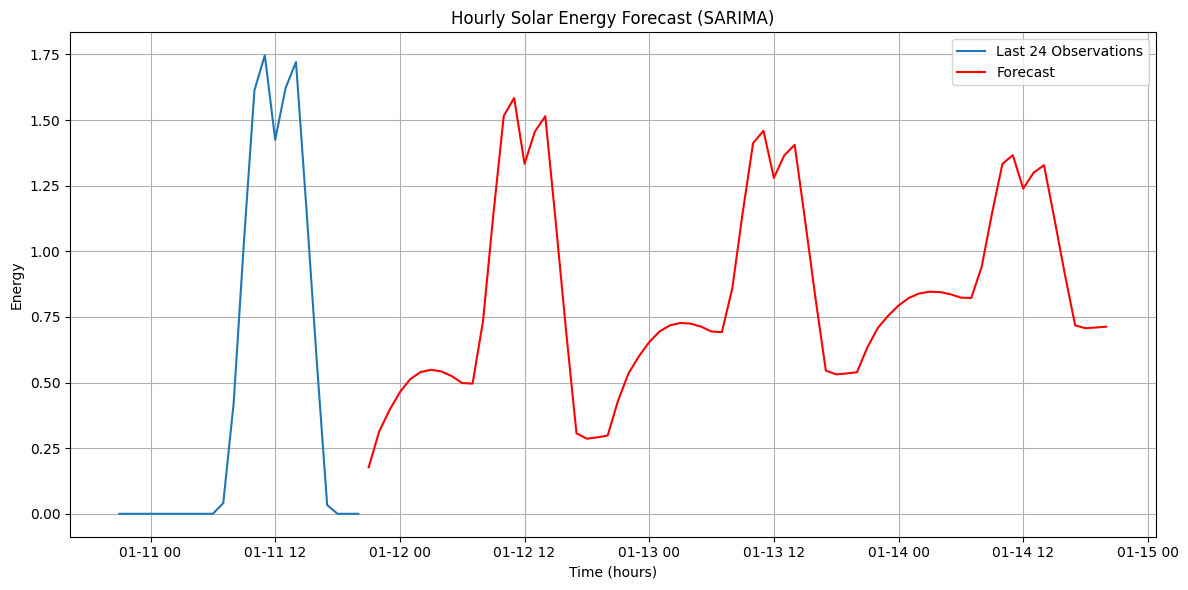

In [31]:
n_periods = 72
predictions = best_model.predict(n_periods=n_periods)

plt.figure(figsize=(12, 6))
plt.plot(ts_data[-24:], label='Last 24 Observations')
plt.plot(predictions, color='red', label='Forecast')
plt.legend()
plt.title("Hourly Solar Energy Forecast (SARIMA)")
plt.xlabel("Time (hours)")
plt.ylabel("Energy")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5) Validation

## 5.1) Errors Analysis

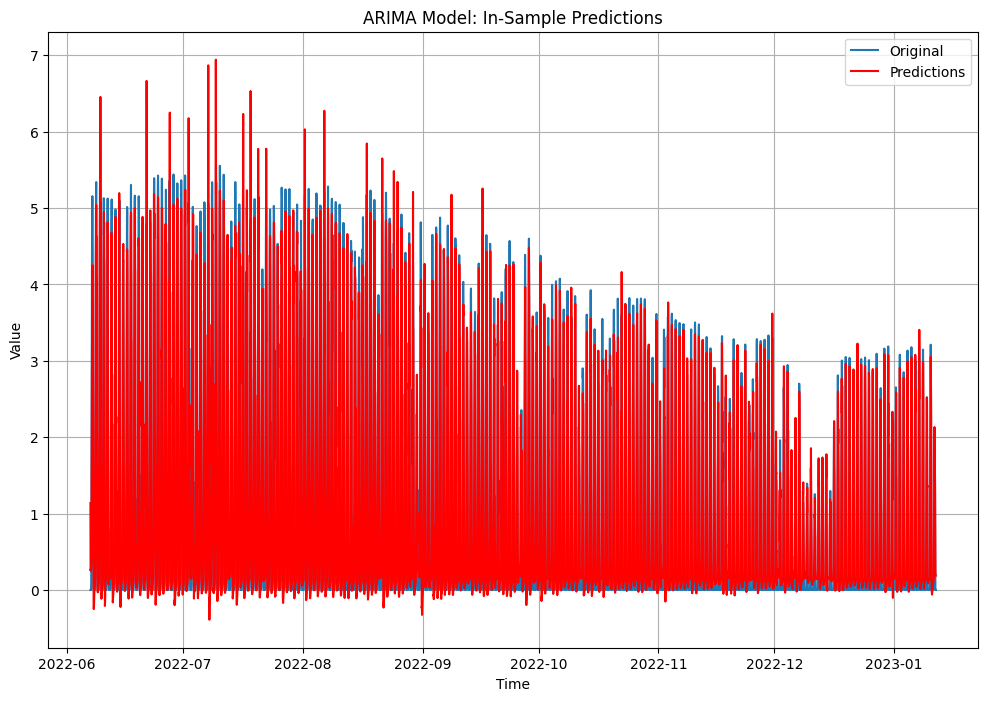

MAE: 0.212
MSE: 0.153
RMSE: 0.391


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = best_model.predict_in_sample()

plt.figure(figsize=(12, 8))
plt.plot(ts_data, label='Original')
plt.plot(predictions, color='red', label='Predictions')
plt.legend()
plt.title("ARIMA Model: In-Sample Predictions")
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

mae = mean_absolute_error(ts_data, predictions)
mse = mean_squared_error(ts_data, predictions)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")


## 5.2) Residual Analysis

## a) Risiduals

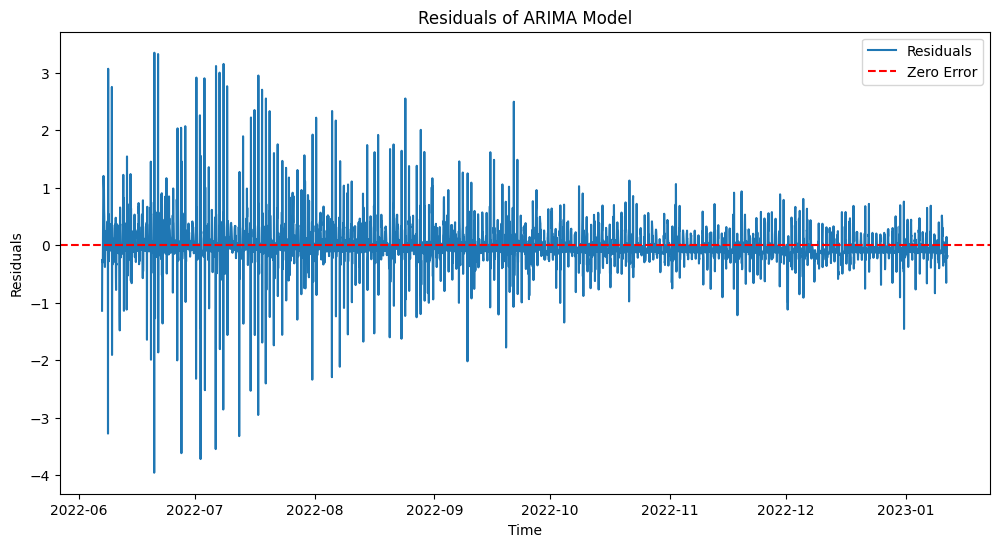

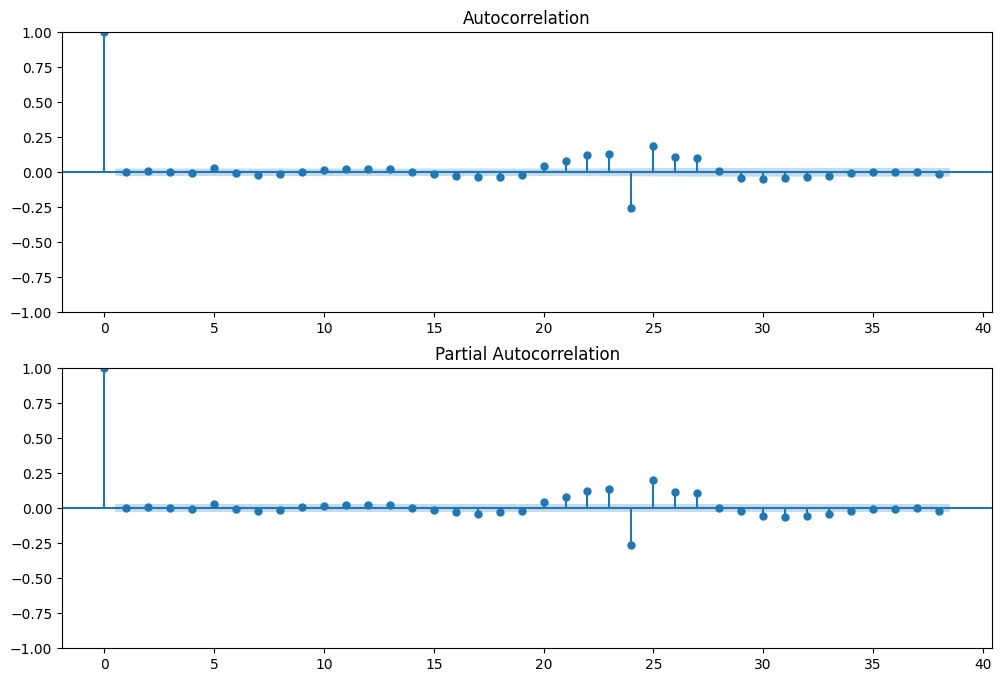

In [43]:
residuals = best_model.resid() # residuals = ts_data - predictions


plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.legend()
plt.title("Residuals of ARIMA Model")
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(residuals, ax=ax1)
plot_pacf(residuals, ax=ax2)
plt.show()

## b) making sure that the risidual is a white noise

In [44]:
# 1. ADF Test
adf_result = adfuller(residuals)
print("ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values: {adf_result[4]}")
print()

# 2. KPSS Test
kpss_result = kpss(residuals, regression='c')  # 'c' for constant, 'ct' for constant and trend
print("KPSS Test Results:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print(f"Critical Values: {kpss_result[3]}")
print()

# 3. PP Test
pp_result = pp(residuals)
print("PP Test Results:")
print(f"PP Statistic: {pp_result.stat}")
print(f"p-value: {pp_result.pvalue}")
print(f"Critical Values: {pp_result.critical_values}")

ADF Test Results:
ADF Statistic: -10.689413954845122
p-value: 3.7594801332190026e-19
Critical Values: {'1%': -3.4316035963290337, '5%': -2.862093959137102, '10%': -2.5670648722409877}

KPSS Test Results:
KPSS Statistic: 7.618150210208364
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

PP Test Results:
PP Statistic: -72.88946151968733
p-value: 0.0
Critical Values: {'1%': -3.4315957157264836, '5%': -2.8620904774601432, '10%': -2.567063018820234}


/tmp/ipykernel_142/3522448530.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(residuals, regression='c')  # 'c' for constant, 'ct' for constant and trend


# The residuals of the best ARIMA model are stationary, fluctuate around 0, and have no autocorrelation (p=0 and q=0 look at ACF/PACF), then they can be considered white noise.

# 6) Predictions of futures

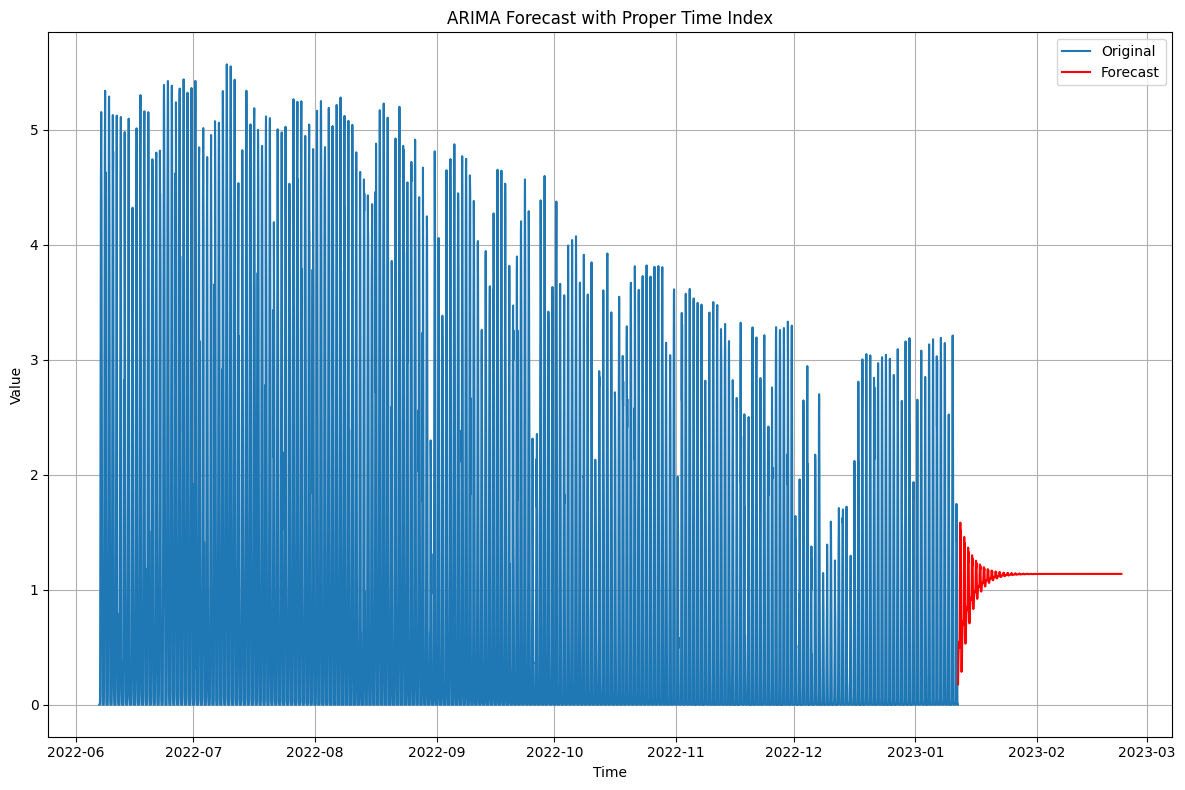

In [50]:
import pandas as pd


last_timestamp = ts_data.index[-1]
freq = ts_data.index.inferred_freq or 'H'

forecast_index = pd.date_range(start=last_timestamp + pd.Timedelta(1, unit=freq[0]), periods=future_steps, freq=freq)

forecast = best_model.predict(n_periods=future_steps)

plt.figure(figsize=(12, 8))
plt.plot(ts_data, label='Original')
plt.plot(forecast_index, forecast, color='red', label='Forecast')
plt.title("ARIMA Forecast with Proper Time Index")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
